In [22]:
import numpy as np
from matplotlib import pyplot as plt

### Q2

In [ ]:
y = np.array([83, 42, 79, 16, 24, 73, 60, 44, 47, 67])
x = np.array([18.1, 8, 16.8, 2.8, 3.9, 12.7, 11.5, 9.5, 8.0, 13.2])


In [ ]:
mxy = np.mean(x * y)
print(mxy)
mx2 = np.mean(x * x)
print(mx2)
mxy / mx2

In [ ]:
a1 = np.array(x * x)
a2 = np.array(x)
a3 = np.ones(a2.shape)
A = np.stack((a1, a2, a3)).T
y = y[:, np.newaxis]
print(A.shape)
print(y.shape)
B = A.T @ y


In [ ]:
print(A.T @ A)
print(B)
np.linalg.solve(A.T@A,  B)

### Q5(b)

Prepare the initial values and matrix A. Calculate input vector $u$ using $\hat{u} = A^T(AA^T)^{-1}b$

In [9]:
N = 120
waypoint_idx = [20, 35, 60]
A = np.empty((len(waypoint_idx)*2, N))
i = 0
for idx in waypoint_idx:
    A1 = [0 if i % 2 != 0 else idx - i/2 for i in range(idx*2)]
    A1 = A1 + (N - len(A1))*[0.0]
    A1 = np.array(A1)[np.newaxis,:] 
    A2 = [0 if i % 2 == 0 else idx+1 - (i+1)/2 for i in range(idx*2)]
    A2 = A2 + (N - len(A2))*[0.0]
    A2 = np.array(A2)[np.newaxis,:] 
    A[i,:] = A1
    A[i+1,:] = A2
    i += 2

b = np.array([3,2,6,-1,0,0])[:,np.newaxis]
u = A.T@np.linalg.inv((A@A.T))@b

Generate vector $x$ as a function of time $t$

In [10]:
x = np.empty((61,2))
# Force to create a column vector
x0 = np.array([[1, 1]]).T
v0 = np.array([[0, 0]]).T
xt = x0
vt = v0
x[0,:] = x0.flatten()
for dt in range(60):
    vt = vt + u[2*dt:2*dt+2,:]
    xt = xt + vt
    x[dt+1] = xt.flatten()

Plot trajectory $x$

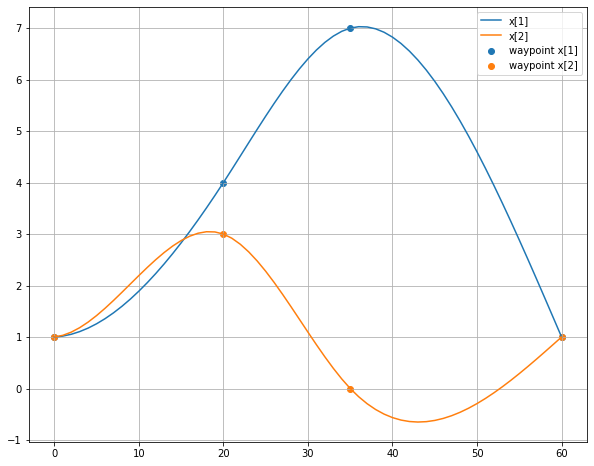

In [14]:
t = np.linspace(0, 60, 61)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(t,x,label=['x[1]','x[2]'])
ax.scatter([0,20,35,60],[1,4,7,1],label='waypoint x[1]')
ax.scatter([0,20,35,60],[1,3,0,1],label='waypoint x[2]')
ax.grid(True)
ax.legend()
plt.show()

### Q5(c)

Generate vector $u_t$ as a function of $t$ and plot it.

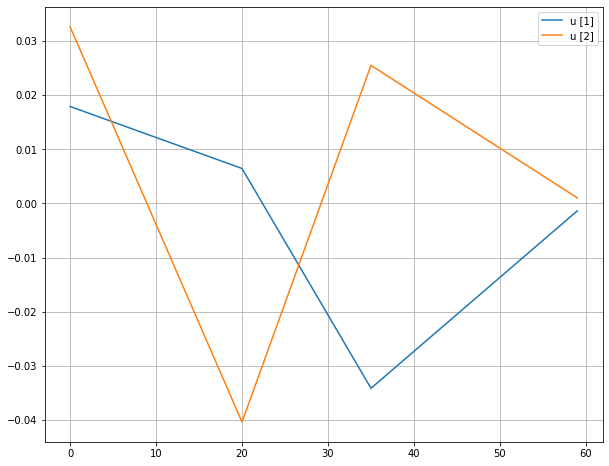

In [17]:
ut = u.reshape((60, 2))
t = np.linspace(0, 59, 60)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(t, ut, label=['u [1]', 'u [2]'])
ax.grid(True)
ax.legend()
plt.show()

### Q6(a)

Prepare the data

In [36]:
t = np.arange(1, 501)   # time points
ytrue = 2*np.sin(t/50) + np.cos(t/20)   # true signal
np.random.seed(1)
ymeas = ytrue + np.random.randn(1,500).flatten()    # noisy measuremnet

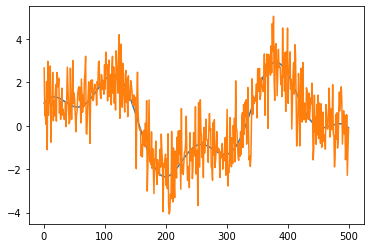

In [37]:
plt.plot(t,ytrue)
plt.plot(t,ymeas)